# Gain ( somme à addition en plus de la mise de départ si victoire ): 

    - Rouge, Noir, Pair, Impair, 1 à 18, 19 à 36 : mise * 1
    - à cheval sur 2 colonnes ( moitié des nombres ), douze nombres à cheval ( 1/3 des nombres, 24 ) : mise * 0.5
    - colonne, douzaine : mise * 2
    - sixain ( six nombres ) : mise * 5
    - à cheval sur deux cases : mise * 17
    - un seul nombre : mise * 35
    - 1/3 : mise * 3 ( pas à additionner à la mise de départ )

In [1]:
import numpy as np
import numpy.random as rd


def tirage_num(n):
    return rd.randint(0, 36, n)

def rouge_noir(nb):
    rouge = [1, 3, 5, 7, 9, 12, 14, 16, 18, 19, 21, 23, 25, 27, 30, 32, 34, 36]
    noir = [2, 4, 6, 8, 10, 11, 13, 15, 17, 20, 22, 24, 26, 28, 29, 31, 33, 35]
    if nb in rouge:
        return 1
    elif nb in noir:
        return 2
    else:
        return 0

def tiers(nb):
    tiers_1 = [3,6,9,12,15,18,21,24,27,30,33,36]
    tiers_2 = [2,5,8,11,14,17,20,23,26,29,32,35]
    tiers_3 = [1,4,7,10,13,16,19,22,25,28,31,34]
    if nb in tiers_1:
        return 1
    elif nb in tiers_2:
        return 2
    elif nb in tiers_3:
        return 3
    else:
        return 0

def pair_impair(nb):
    if nb % 2 == 0:
        return 0
    else:
        return 1
    
def victoire_pair_rouge(nb, argent): # on considère que l'on joue à chaque partie 1€ sur rouge et 1€ sur pair
    argent -= 2
    if(rouge_noir(nb) == 1 and pair_impair(nb) == 0):
        argent += 4
    elif(rouge_noir(nb) == 1):
        argent += 2
    elif(pair_impair(nb) == 0):
        argent += 2
    if(pair_impair(nb) == 1 and rouge_noir(nb) == 2 ):
        argent += 0
        
    return argent

def victoire_tiers(nb, argent): # on considère que l'on joue à chaque partie 1€ sur le tiers 1 et 1€ sur le tiers 2
    argent -= 2
    if(tiers(nb) == 1 or tiers(nb) == 2):
        argent += 3
        
    return argent


def partie(cashin,tirage): # cashin = prix auquel on veut stopper la partie, tirage = nombre de tirage par partie
    argent_base = 10
    max = argent_base
    for i in tirage_num(tirage):
        if(argent_base > 0 and argent_base < cashin):
            argent_base = victoire_tiers(i, argent_base)
            if(argent_base > max):
                max = argent_base
        else:
            break
    return argent_base

def npartie_return_argent(n,cashin, tirage): # comme au dessus mais le boucle n fois
    list = [] 
    for i in range(n):
        argent_base = 10
        for i in tirage_num(tirage):
            if(argent_base > 0 and argent_base < cashin):
                argent_base = victoire_tiers(i, argent_base)
            else:
                break
        list.append(argent_base)
    return list
    
def npartie(n,cashin,tirage): # n = nombre de partie que l'on veut faire, cashin = prix auquel on veut stopper la partie, tirage = nombre de tirage par partie
    nb = 0
    gagnée = 0
    perdue = 0
    autre = 0
    for i in range(n):
        nb = partie(cashin,tirage)
        if(nb == cashin):
            gagnée += 1
        elif(nb > 0 and nb < cashin):
            autre += 1
        elif(nb == 0):
            perdue += 1
    return gagnée, perdue, autre
        
list = []
count = 20
for i in range(count):
    list.append(npartie(1000,20,10))

print(list)

gagnee_moy = 0
perdue_moy = 0
autre_moy = 0

for i in list:
    gagnee_moy += i[0]
    perdue_moy += i[1]
    autre_moy += i[2]


print("moyenne séances gagnée ( stop à 14€ ) :", (gagnee_moy/count)/100)
print("moyenne séances perdue ( stop à 14€ ) :", (perdue_moy/count)/100)
print("moyenne séances finies à + de 0 mais moins de 14 ( stop à 14€ ) :", (autre_moy/count)/100)


[(11, 22, 937), (13, 31, 941), (13, 24, 944), (15, 28, 933), (7, 26, 947), (4, 27, 947), (19, 24, 928), (18, 18, 933), (7, 20, 949), (13, 22, 945), (19, 21, 940), (18, 27, 943), (16, 16, 947), (9, 28, 938), (14, 21, 935), (18, 27, 937), (13, 29, 942), (12, 30, 929), (8, 20, 957), (10, 21, 956)]
moyenne séances gagnée ( stop à 14€ ) : 0.1285
moyenne séances perdue ( stop à 14€ ) : 0.24100000000000002
moyenne séances finies à + de 0 mais moins de 14 ( stop à 14€ ) : 9.414


(array([-1,  0,  2,  5,  8, 11, 14, 17, 20]), array([ 12,  30,  60, 164, 252, 244, 172,  50,  16], dtype=int64))


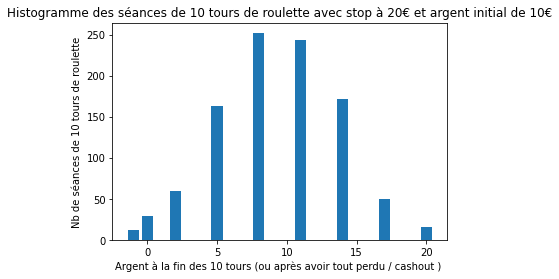

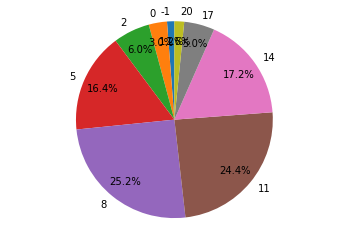

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Tab = []
Tab.append(npartie_return_argent(1000,20,10))
res = np.unique(Tab, return_counts = True)
print(res)

plt.bar(res[0], res[1])
plt.ylabel('Nb de séances de 10 tours de roulette')
plt.xlabel('Argent à la fin des 10 tours (ou après avoir tout perdu / cashout ) ')
plt.title('Histogramme des séances de 10 tours de roulette avec stop à 20€ et argent initial de 10€')

fig1, ax1 = plt.subplots()
ax1.pie(res[1], labels=res[0], autopct='%1.1f%%', startangle=90, pctdistance=0.8)
ax1.axis('equal') 

plt.show()
